# Домашнее задание: Полносвязные нейронные сети

Задание выполнил(а):

    (впишите свои фамилию и имя)

## Общая информация

__Внимание!__  


* Домашнее задание выполняется самостоятельно
* Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов
* Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов
* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе

## О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

## Импорт библиотек и загрузка данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm.notebook import tqdm

In [ ]:
plt.rcParams.update({"font.size": 16})
sns.set_style("whitegrid")
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2025-05-11 16:23:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [              <=>   ] 201.24M  18.4MB/s    in 11s     

2025-05-11 16:23:31 (17.5 MB/s) - ‘data.txt.zip’ saved [211011981]



In [ ]:
df = pd.read_csv("data.txt.zip", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

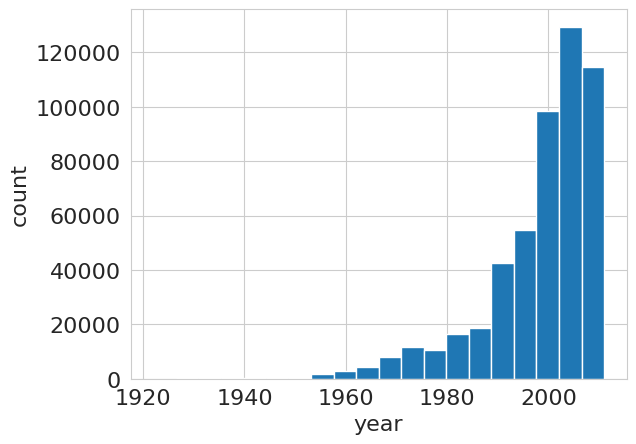

Range: 1922 - 2011
Unique values: 89


In [ ]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel("year")
plt.ylabel("count")
plt.show()
print(f"Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}")
print(f"Unique values: {np.unique(df.iloc[:, 0]).size}")

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе (также пропишите текстом, какая константа будет лучшей для MSE).

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
# Так как Ridge регрессия штрафует за большие веса, датасет нужно нормировать (скалировать).
# Иначе Ridge будет штрафовать за погрешность в каких-то из признаков гораздо сильнее чем за другие признаки
# У кого-то из признаков сейчас стандартное отклонение 6, у кого-то 185. Исправим это:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# проверим сейчас Ridge регрессию с весом для слагаемого отвечающего за штраф alpha = 1
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Предсказания и оценка качества
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge регрессия MSE: {ridge_mse:.2f}")

Ridge регрессия MSE: 89.75


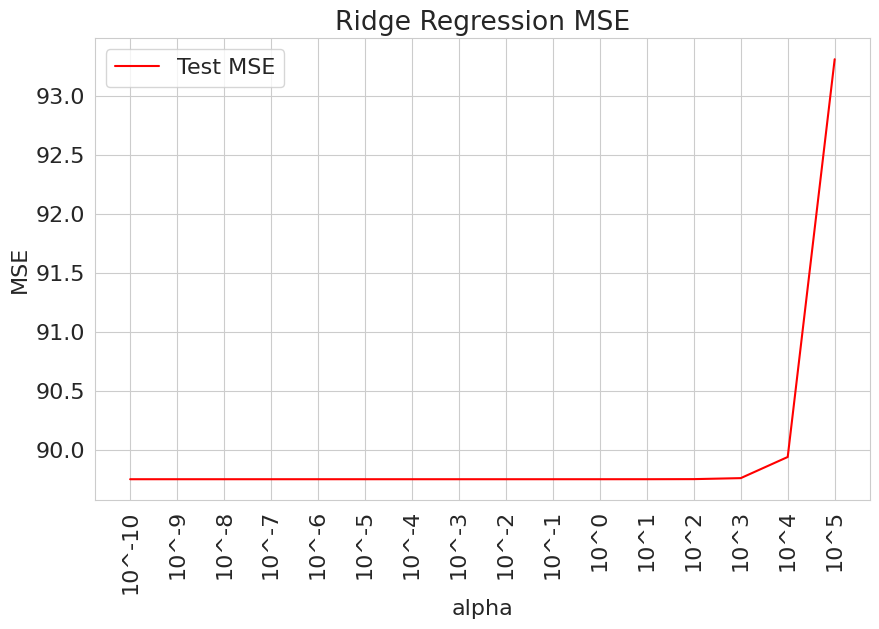

Лучшее значение параметра alpha: 1e-10 с ошибкой на тестовой выборке MSE: 89.75


In [ ]:
# А сейчас пробежимся для большего количества значений alpha

alphas = [10**i for i in range(-10, 6)]  # [1, 10, 100, ..., 10^7]
results = {'alpha': [], 'mse_train': [], 'mse_test': []}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_test_predict = model.predict(X_test_scaled)
    mse_test = mean_squared_error(y_test, y_test_predict)
    results['alpha'].append(alpha)
    results['mse_test'].append(mse_test)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(np.log10(results['alpha']), results['mse_test'], 'r-', label='Test MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression MSE')
plt.xticks(np.log10(alphas), labels=[f'10^{i}' for i in range(-10, 6)], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Вывод лучшего alpha
best_alpha = results['alpha'][np.argmin(results['mse_test'])]
best_mse = np.min(results['mse_test'])
print(f'Лучшее значение параметра alpha: {best_alpha} с ошибкой на тестовой выборке MSE: {best_mse:.2f}')

In [ ]:
# А теперь взглянем лучший константный прогноз по MSE.
# Для метрики MSE наилучшим константным прогнозом будет среднее значение целевой переменной в обучающей выборке

best_constant = int(np.mean(y_train))
y_pred_constant = np.full_like(y_test, best_constant)
constant_mse = mean_squared_error(y_test, y_pred_constant)
print(f"Значение среднего обучающей выборки, которым модель предсказывает любую песню: {best_constant:.2f}")
print(f"Ошибка MSE с помощью такой модели: {constant_mse:.2f}")

Значение среднего обучающей выборки, которым модель предсказывает любую песню: 1998.00
Ошибка MSE с помощью такой модели: 117.83


**Ответ:**

Получается, что Лучший прогноз по Ridge регрессии при $\alpha = 10^{-10}$, равен $MSE_{RIDGE} = 89.75$

Получается плохая модель, ведь если пронозировать просто константой (матожиданием возраста), то ошибка будет $MSE_{Mean} = 117.83$   

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0xE2E4
)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [ ]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label="train")
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label="val")
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label="train")
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label="val")

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale("log")

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale("log")

    for ax in axs:
        ax.set_xlabel("epoch")
        ax.legend()

    axs[0].set_ylabel("loss")
    axs[1].set_ylabel("MSE")
    plt.show()


def train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=True,
):
    """
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """

    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    # Используется google colab со своими ресурсами, но напишу код, который переносит вычисления на GPU, если это можно сделать:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}")
            if verbose
            else train_loader
        )

        # Фаза обучения
        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            """
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            """
            # Занулим градиенты чтобы не копились
            optimizer.zero_grad()
            # Прямой ход нейросети
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            # Обратный ход и пересчет весов
            loss.backward()
            optimizer.step()


            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(val_loader, desc=f"Validating {epoch}/{num_epochs}")
            if verbose
            else val_loader
        )

        # Фаза валидации
        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                """
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                """
                # Прямой ход
                predictions = model(X_batch)
                # Посчитать ошибку
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f"Validation MSE: {val_metrics[-1]:.3f}")

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [ ]:
# Для того чтобы запускать код на ускорителе
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используется устройство: {device}")

Используется устройство: cuda


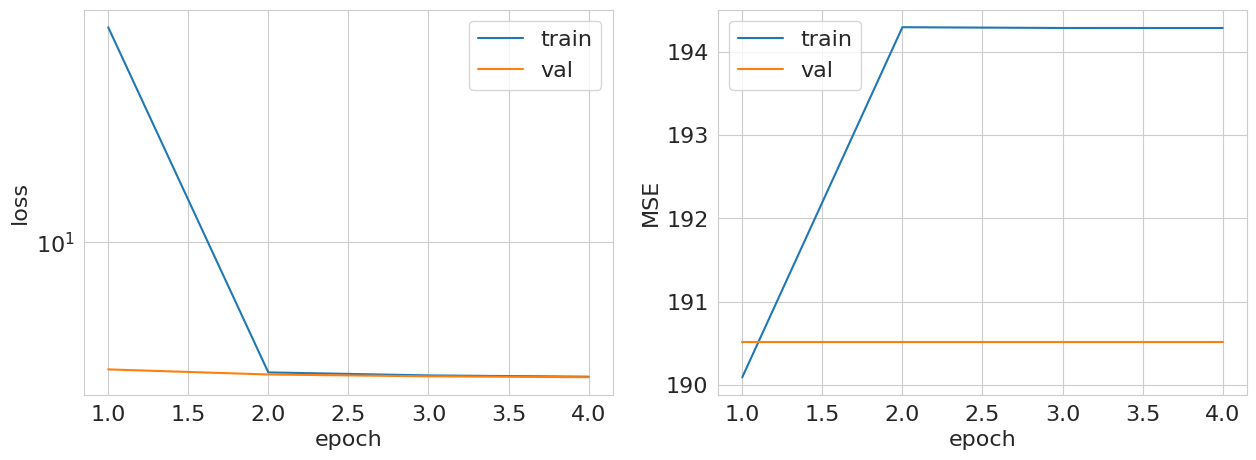

Validation MSE: 190.512


In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

import torch.optim as optim

def prepare_data(X_train, y_train, X_val, y_val, batch_size=64):
    # Здесь возникает ошибка, если не переносить на GPU, так как данные будут на CPU, а модель сама будет на GPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Преобразование целевой переменной в диапазон [0, C-1]
    unique_y = np.unique(np.concatenate((y_train, y_val))) # выделяем все годы, которые есть в датасете

    # Преобразуем целевую переменную в соответствующий ей порядковый класс: 1922 -> 0; 1923 -> 1, 1924 -> 1 (тоже потому что 1923 в датасете нет)..., 2011 -> 88
    y_train_transformed = np.searchsorted(unique_y, y_train)
    y_val_transformed = np.searchsorted(unique_y, y_val)

    # Как и сказано в ТЗ, передаю целевую переменную [0, C-1] в TensorDataset
    train_dataset = TensorDataset(
        torch.from_numpy(X_train).float().to(device), # преобразуем в torch.float32
        torch.from_numpy(y_train_transformed).long().to(device)  # Для CrossEntropy нужен long (если запускать с int32 выдаст ошибку)
    )
    val_dataset = TensorDataset(
        torch.from_numpy(X_val).float().to(device),
        torch.from_numpy(y_val_transformed).long().to(device)
    )

    # Подгружает данные, батч равен заданному batch_size
    # C перемешиванием данных перед каждой эпохой
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader, unique_y

# Архитектура сети
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


def train_model(X_train, y_train, X_val, y_val, num_epochs=4):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # В train_loader, val_loader записываю TensorDataset'ы, где целевая переменная смещена до классов [0, C-1]
    train_loader, val_loader, unique_y = prepare_data(X_train, y_train, X_val, y_val)

    # Создаю архитектуру модели, где будет 88 классов (num_classes)
    input_size = X_train.shape[1]
    hidden_size = 128
    num_classes = len(unique_y)
    model = Net(input_size, hidden_size, num_classes).to(device)

    optimizer = optim.SGD(model.parameters(), lr=1e-2)
    criterion = nn.CrossEntropyLoss()

    # Считаем Loss
    def pred_to_year(predictions, y_true):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Получаем предсказанные классы (Для каждого примера мы по максимальному значению логита предсказанный класс)
        # Сейчас predicted_classes на GPU
        _, predicted_classes = torch.max(predictions, 1)

        # Возвращаемся к правильным годам: 0->1922, 1->1924, ..., 88->2011
        predicted_years = torch.tensor([unique_y[c.item()] for c in predicted_classes],
                                     dtype=torch.float32)
        y_true_years = torch.tensor([unique_y[c.item()] for c in y_true],
                                     dtype=torch.float32)
        predicted_years_gpu = predicted_years.to(device)
        y_true_years_gpu = y_true_years.to(device)
        # Считаем MSE между предсказанными годами и истинными
        # print(predicted_years_gpu,y_true_years_gpu)
        return torch.mean((predicted_years_gpu - y_true_years_gpu.float())**2)
        # Здесь мы не учитываем, что если модель почти правильно предсказала класс, то она должна штрафоваться меньше, чем 100% указала на другой класс

    print(f"Model device: {next(model.parameters()).device}")
    X_batch, y_batch = next(iter(train_loader))
    print(f"Train loader: X_batch.device = {X_batch.device}, y_batch.device = {y_batch.device}")

    # Для val_loader
    X_batch, y_batch = next(iter(val_loader))
    print(f"Val loader: X_batch.device = {X_batch.device}, y_batch.device = {y_batch.device}")

    # Обучение
    train_mse, val_mse = train_and_validate(
        model=model,
        optimizer=optimizer,
        criterion=criterion,
        metric=pred_to_year,
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=num_epochs,
        verbose=True
    )

    return model, train_mse, val_mse

# Пример использования
model, train_mse, val_mse = train_model(X_train, y_train, X_test, y_test)

**Здесь ниже показал, что модель предсказывает только 2007 год, остальные годы она не предсказывает (на случайных 200 примерах из теста)**

In [ ]:
unique_y = np.unique(np.concatenate((y_train, y_val))) # выделяем все годы, которые есть в датасете
def predict_and_compare(model, X_test, y_test, unique_y, n_samples=10):
    device = next(model.parameters()).device  # Определяем устройство модели

    # Выбираем случайные индексы
    random_indices = np.random.choice(len(X_test), size=n_samples, replace=False)

    print(f"{'Пример':<10} | {'Предсказанный год':<16} | {'Реальный год':<12} | {'Разница':<8}")
    print("-" * 50)

    model.eval()
    with torch.no_grad():
        for i, idx in enumerate(random_indices, 1):
            # Подготовка данных
            sample = X_test[idx:idx+1]  # Сохраняем размерность [1, n_features]
            true_year = y_test[idx]

            # Преобразуем в тензор и переносим на нужное устройство
            input_tensor = torch.from_numpy(sample).float().to(device)

            # Предсказание
            logits = model(input_tensor)
            predicted_class = torch.argmax(logits, dim=1).item()
            predicted_year = unique_y[predicted_class]

            # Вывод результатов
            diff = abs(predicted_year - true_year)
            print(f"{i:<10} | {predicted_year:<16} | {true_year:<12} | {diff:<8}")

# Пример использования
predict_and_compare(model, X_test, y_test, unique_y, n_samples=2000)

Пример     | Предсказанный год | Реальный год | Разница 
--------------------------------------------------
1          | 2007             | 1996         | 11      
2          | 2007             | 2003         | 4       
3          | 2007             | 2005         | 2       
4          | 2007             | 2009         | 2       
5          | 2007             | 2003         | 4       
6          | 2007             | 2003         | 4       
7          | 2007             | 2003         | 4       
8          | 2007             | 1973         | 34      
9          | 2007             | 1988         | 19      
10         | 2007             | 1998         | 9       
11         | 2007             | 2004         | 3       
12         | 2007             | 2006         | 1       
13         | 2007             | 1989         | 18      
14         | 2007             | 2009         | 2       
15         | 2007             | 2006         | 1       
16         | 2007             | 2005         | 2    

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:**
Бейзлайн приблизить не удалось. Модель просто почти на каждом исходном данном говорит год 2007. Это самый популярный год в выборке среди песен.

Идея обучать классификатор плохая, потому что:


*   Классификатор не учитывает разницу между годами, в отличие от регрессии. Для него между 1922 и 2007 такая же разница, как между 2006 и 2007, а регрессия бы эту разницу посчитала разной.
*   CrossEntropy и MSE конфликтуют: Оптимизация CrossEntropy не гарантирует минимизацию MSE между годами, это видно на графике развития MSE и Loss в зависимости от эпохи
*   CrossEntropyLoss "не видит" разницы между близкими и далёкими годами, поэтому модель быстро коллапсирует к предсказанию моды (самого частого года). Причем когда мы оценивали константой для MSE, мы учитывали разницу между годами, поэтому предсказывалось 50% квантилью распределения годов. Но эта модель просто предсказывает самый частый класс, так как не видит расстояния между годами.
*   Нужно попробовать сделать целевую функцию MSE между годами.
*   По графику Loss функции (CrossEntropy) можно видеть, то что после первой эпохи значение упало. Это потому что модель учится "уверенно" предсказывать 2007 год. Если после 1ой эпохи она присваивает непопулярным классам -0.35 , а популярным 1.7 или 1.8. После 4ой эпохи она присваивает непопулярным классам -0.84, а популярным (2006, 2007 год) между 2.5 и 2.6. Таким образом Loss функция, которая считает близость полученных логитов к эталону, просто принимает меньшие значения на почти всех примерах.




**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

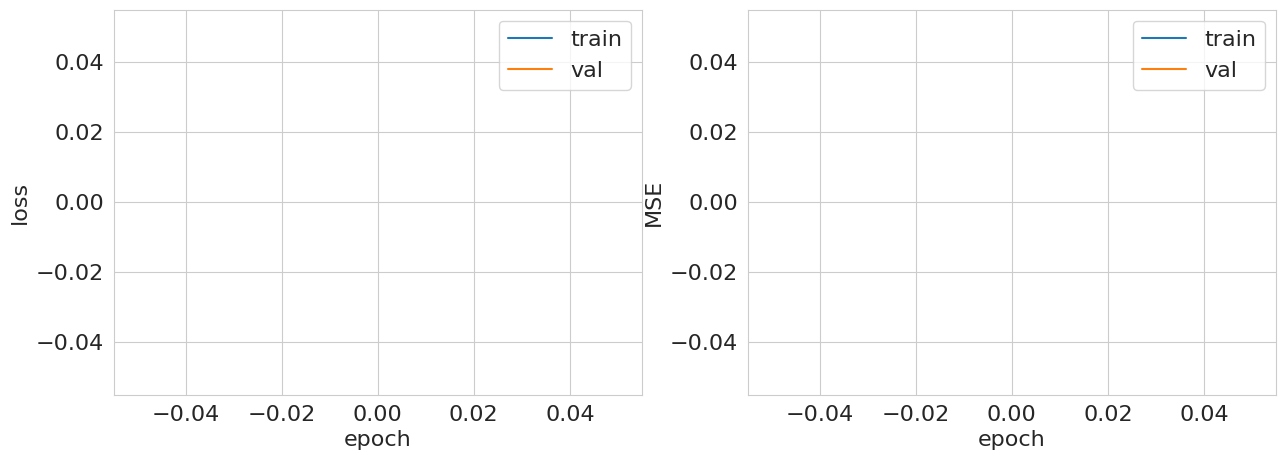

Validation MSE: nan


In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

import torch.optim as optim

def prepare_data_regression(X_train, y_train, X_val, y_val, batch_size=64):
    # Переносим данные на GPU, если доступно
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Создаем TensorDataset с reshape (-1, 1) для целевой переменной
    train_dataset = TensorDataset(
        torch.from_numpy(X_train).float().to(device),
        torch.from_numpy(y_train).float().to(device).reshape(-1, 1)
    )
    val_dataset = TensorDataset(
        torch.from_numpy(X_val).float().to(device),
        torch.from_numpy(y_val).float().to(device).reshape(-1, 1)
    )

    # Создаем DataLoader с перемешиванием для train
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader

# Архитектура сети для регрессии
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)  # Один выходной нейрон для регрессии

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train_regression_model(X_train, y_train, X_val, y_val, num_epochs=4):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Подготовка данных
    train_loader, val_loader = prepare_data_regression(
        X_train, y_train, X_val, y_val)

    # Создание модели
    input_size = X_train.shape[1]
    hidden_size = 128
    model = RegressionNet(input_size, hidden_size).to(device)

    optimizer = optim.SGD(model.parameters(), lr=1e-4)
    criterion = nn.MSELoss()  # MSE loss для регрессии

    # Функция для вычисления MSE в исходных единицах (годах)
    def mse(predictions, y_true):
        return torch.mean((predictions - y_true)**2)

    print(f"Model device: {next(model.parameters()).device}")
    X_batch, y_batch = next(iter(train_loader))
    print(f"Train loader: X_batch.device = {X_batch.device}, y_batch.device = {y_batch.device}")

    X_batch, y_batch = next(iter(val_loader))
    print(f"Val loader: X_batch.device = {X_batch.device}, y_batch.device = {y_batch.device}")

    # Обучение
    train_mse, val_mse = train_and_validate(
        model=model,
        optimizer=optimizer,
        criterion=criterion,
        metric=mse,
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=num_epochs,
        verbose=True
    )

    return model, train_mse, val_mse

# Пример использования
reg_model, reg_train_mse, reg_val_mse = train_regression_model(
    X_train, y_train, X_val, y_val)

In [ ]:
# Для разбора почему у нас бесконечные градиенты
print("Проверка данных:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train min/max: {y_train.min()}/{y_train.max()}")
print(f"X_train mean: {np.mean(X_train, axis=0)}")
print(f"X_train std: {np.std(X_train, axis=0)}")

Проверка данных:
X_train shape: (289881, 90)
y_train min/max: 1922/2011
X_train mean: [ 4.33543375e+01  1.03782588e+00  8.64314779e+00  1.07551970e+00
 -6.47802908e+00 -9.56114872e+00 -2.42187660e+00 -1.78910662e+00
  3.72084178e+00  1.87383143e+00 -1.49384189e-01  2.53574761e+00
  3.36180453e+01  2.43429675e+03  1.96497313e+03  1.51096785e+03
  9.10387192e+02  8.76986096e+02  6.03618555e+02  5.15343600e+02
  3.94141705e+02  3.24699720e+02  2.88024584e+02  2.92653781e+02
  4.31072661e+01  4.32429178e+01 -4.44856693e+01 -2.77282183e+01
  1.40064874e+01  4.46600630e+01  5.57087938e+00  2.39760810e+01
  9.94324997e+00 -4.24706722e+00  7.64069052e-01  7.30414683e+01
 -5.10352904e+01  1.16214959e+02 -1.89963967e+02  2.40950755e+01
 -1.22312892e+00  1.84843915e+01 -5.19275580e+01  3.04823148e+00
 -1.59247674e+00  6.53550788e+00  7.67639179e+01  1.44086939e+02
 -8.59537128e+01  2.52930851e+01  6.19114964e+00  2.86668288e+01
  1.24499392e+01  1.88023288e+00 -1.02178279e+01  6.44493945e+01
  1.

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:**
* Стабилизировать обучение не удалось, метрики и лосс функция равны NaN (поскольку происходит взрыв градиента). Подробнее про взрыв градиента: при обратном ходе по слоям нейросети, перемножаются производные функций активации и вес, который был на входе. Так как мы не нормировали X, а ReLu = max(0,x) не ограничивает данные сверху, значение итогового градиента получается больше максимального числа, которое может храниться в переменной MSE (float32), поэтому на обучении мы видим, что MSE = NaN, Loss=NaN. Не спасает то, что Y $\in[1922, 2011]$, поэтому на первых этапах ошибка MSE может быть огромной (последний нейрон содержит ответ не нормированный [0,1]), что также сильно увеличивает градиент.
* Изменение lr с 1e-2 до 1e-4 не помогло, поскольку, всё-таки, слишком большие колебания значений в X и Y, не градиенты при стохастическом градиентном спуске имеют слишком большое значение.
*  Одновременно с этим, X_train имеет признаки с масштабами от единиц до тысяч. Это значит нейросеть будет минимизировать самые большие по значению и разбросу признаки, игнорируя маленькие. То есть признаки влияют на обучение не равномерно.
* Для исправления надо использовать либо gradient_clipping (когда слишком большой градиент, обрезаем его заданным значением), и стандартизировать исходные данные (scaled). Также поможет замена функции ReLu(x)=max(0,x) которая не обрезает значения сверху, и имеет производную $∈[0,1]$. В то время как sigmoid обрезает значения входа $∈[0,1]$, и имеет производную максимум 0.25

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [ ]:
# Вычисляем min/max для целевой переменной (y) по обучающей выборке
y_min = y_train.min()
y_max = y_train.max()

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return (sample - y_min) / (y_max - y_min)


def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return sample * (y_max - y_min) + y_min


Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений.

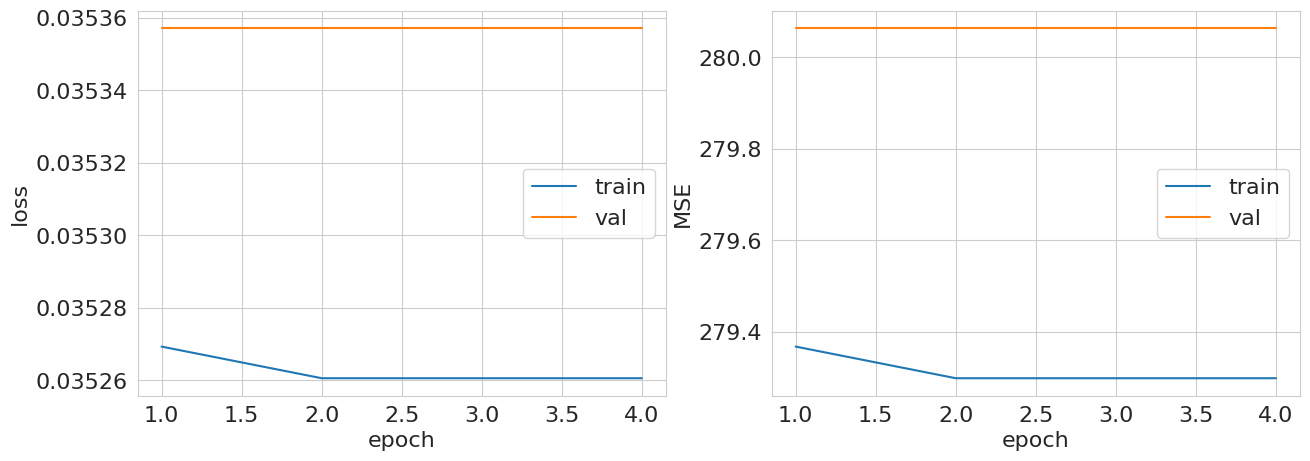

Validation MSE: 280.064


In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

import torch.optim as optim
from torch.nn import Sigmoid

y_train_norm = normalize(y_train)
y_val_norm = normalize(y_val)

# Архитектура сети с сигмоидной активацией
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = Sigmoid()  # Сигмоидная активация

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)  # Гарантируем выход в [0, 1]
        return out

def train_regression_model(X_train, y_train, X_val, y_val, num_epochs=4):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Подготовка данных
    train_loader, val_loader = prepare_data_regression(X_train, y_train, X_val, y_val)

    # Создание модели
    input_size = X_train.shape[1]
    hidden_size = 128
    model = RegressionNet(input_size, hidden_size).to(device)

    optimizer = optim.SGD(model.parameters(), lr=1e-2)
    criterion = nn.MSELoss()

    # Метрика - MSE на денормализованных данных
    def denormalized_mse(predictions, y_true_norm):
        predictions_denorm = denormalize(predictions)
        y_true_denorm = denormalize(y_true_norm)
        return torch.mean((predictions_denorm - y_true_denorm)**2)

    # Обучение
    train_mse, val_mse = train_and_validate(
        model=model,
        optimizer=optimizer,
        criterion=criterion,
        metric=denormalized_mse,
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=num_epochs,
        verbose=True
    )

    return model, train_mse, val_mse

# Пример использования
reg_model, reg_train_mse, reg_val_mse = train_regression_model(
    X_train, y_train_norm, X_val, y_val_norm)


**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском.

**Ответ:**
Модель нейросети регрессии не учится, это видно по не уменьшающемуся loss'у и MSE. Это может быть связанно с тем, что мы не нормируем X_train, X_test, из-за чего происходит "затухание" градиентов, когда функция sigmoid имеет всюду производную близкую к 0, кроме аргумента $\in$[-5,5]

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

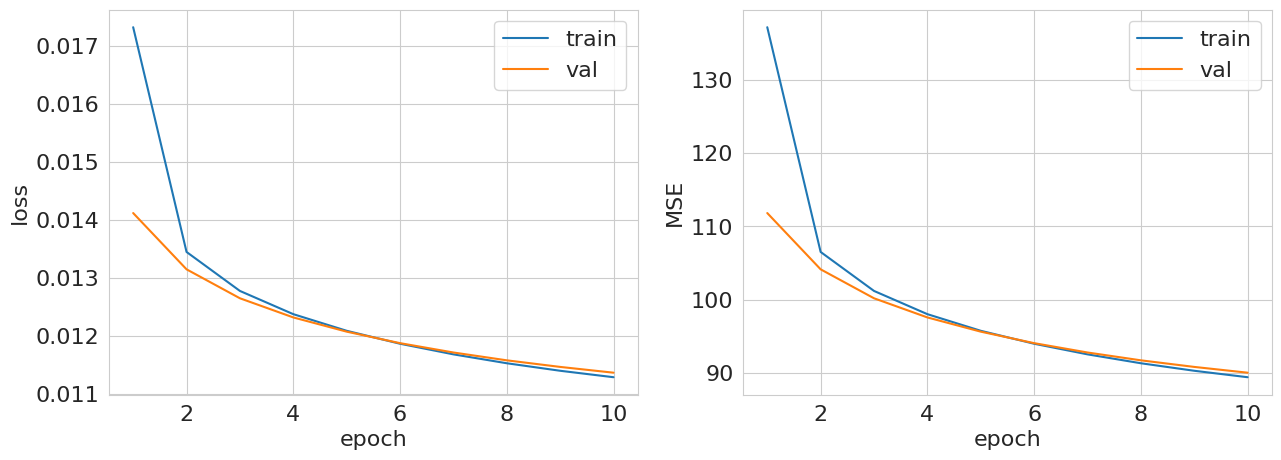

Validation MSE: 90.023


In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler() # Нормировка через средние и стандартные отклонения
 # (если распределение изначально было Гауссово, мы получим стандартное нормально N(0,1))
X_train_norm = x_scaler.fit_transform(X_train)
X_val_norm = x_scaler.transform(X_val)


reg_model, reg_train_mse, reg_val_mse = train_regression_model(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, num_epochs=10)



Получается, что Лучший прогноз по модели нейросети регрессии при добавлении сигмоидальной функции на последнем слое выхода и нормировке X, Y, равен $MSE_{RegNet} = 90.023$, что сравнимо с $MSE_{RIDGE}=89.75$ (не учитывая что это неполный датасет для проверки для нейросети)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее со временем!

Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
def train_regression_model(X_train, y_train, X_val, y_val, num_epochs=4, optimizer_name='adam'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Подготовка данных
    train_loader, val_loader = prepare_data_regression(X_train, y_train, X_val, y_val)

    # Создание модели
    input_size = X_train.shape[1]
    hidden_size = 128
    model = RegressionNet(input_size, hidden_size).to(device)

    # Выбор оптимизатора
    if optimizer_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
    elif optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=1e-3)
    else:
        raise ValueError("optimizer_name должен быть 'sgd' или 'adam'")

    criterion = nn.MSELoss()

    # Метрика - MSE на денормализованных данных
    def denormalized_mse(predictions, y_true_norm):
        predictions_denorm = denormalize(predictions)
        y_true_denorm = denormalize(y_true_norm)
        return torch.mean((predictions_denorm - y_true_denorm)**2)

    # Обучение
    train_mse, val_mse = train_and_validate(
        model=model,
        optimizer=optimizer,
        criterion=criterion,
        metric=denormalized_mse,
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=num_epochs,
        verbose=True
    )

    return model, train_mse, val_mse


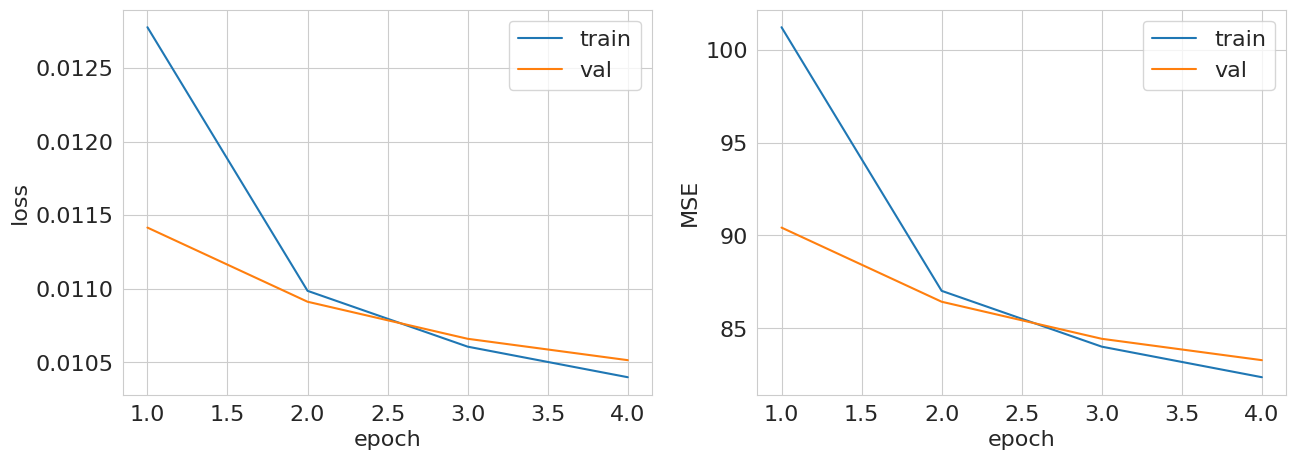

Validation MSE: 83.284


In [ ]:
# SGD + momentum
model_sgd, train_mse_sgd, val_mse_sgd = train_regression_model(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, optimizer_name='sgd'
)


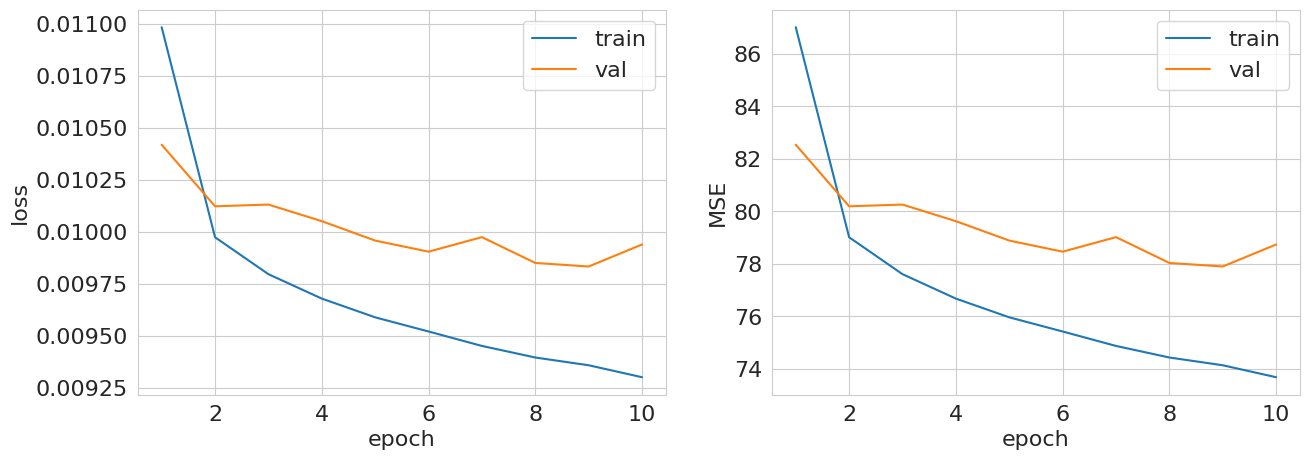

Validation MSE: 78.738


In [ ]:

# Adam
model_adam, train_mse_adam, val_mse_adam = train_regression_model(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, num_epochs = 10,optimizer_name='adam'
)

**Adam показал себя лучше: $MSE_{Adam}=78.73$, $MSE_{SGD}=91.649$**

Однако уже видно что Adam начинает переобучаться на эпохе 5 (поскольку Loss на validation не падает, а даже немного увеличивается)

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

In [ ]:

def train_regression_model(X_train, y_train, X_val, y_val, model = None, num_epochs=4, optimizer_name='adam'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Подготовка данных
    train_loader, val_loader = prepare_data_regression(X_train, y_train, X_val, y_val)

    # Создание модели
    if model == None:
      input_size = X_train.shape[1]
      hidden_size = 128
      model = RegressionNet(input_size, hidden_size).to(device)

    # Выбор оптимизатора
    if optimizer_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
    elif optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=1e-3)
    else:
        raise ValueError("optimizer_name должен быть 'sgd' или 'adam'")

    criterion = nn.MSELoss()

    # Метрика - MSE на денормализованных данных
    def denormalized_mse(predictions, y_true_norm):
        predictions_denorm = denormalize(predictions)
        y_true_denorm = denormalize(y_true_norm)
        return torch.mean((predictions_denorm - y_true_denorm)**2)

    # Обучение
    train_mse, val_mse = train_and_validate(
        model=model,
        optimizer=optimizer,
        criterion=criterion,
        metric=denormalized_mse,
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=num_epochs,
        verbose=True
    )

    return model, train_mse, val_mse

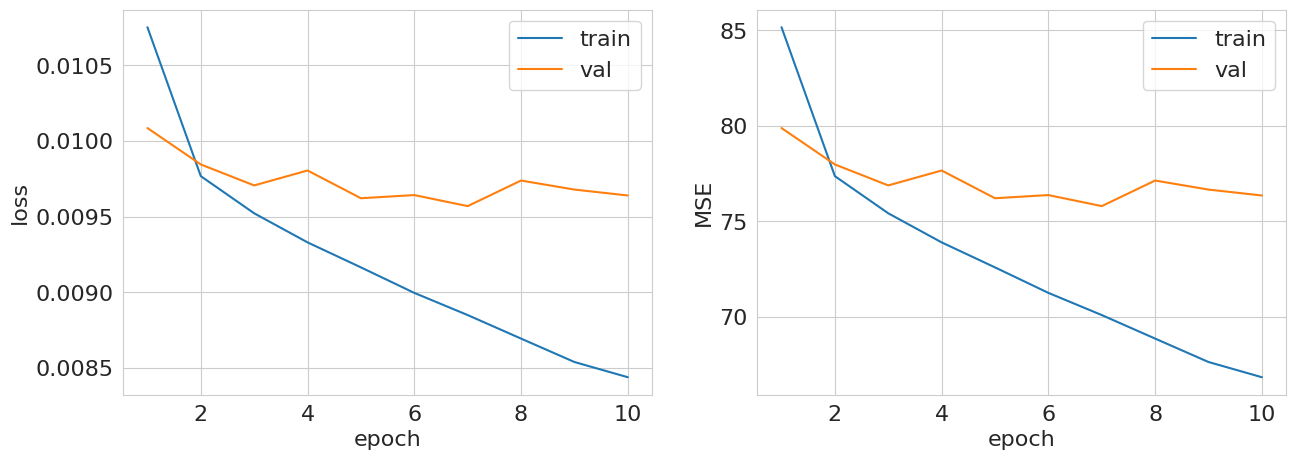

Validation MSE: 76.358


In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Увеличение количества скрытых слоев вдвое:
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = Sigmoid()  # Сигмоидная активация

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

# Создаем архитектуру с количеством скрытых слоев большим вдвое
input_size = X_train.shape[1]
hidden_size = 128
modelRegNetTwoHidden = RegressionNet(input_size, hidden_size).to(device)

model_adam, train_mse_adam, val_mse_adam = train_regression_model(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm,model = modelRegNetTwoHidden, num_epochs = 10,optimizer_name='adam'
)

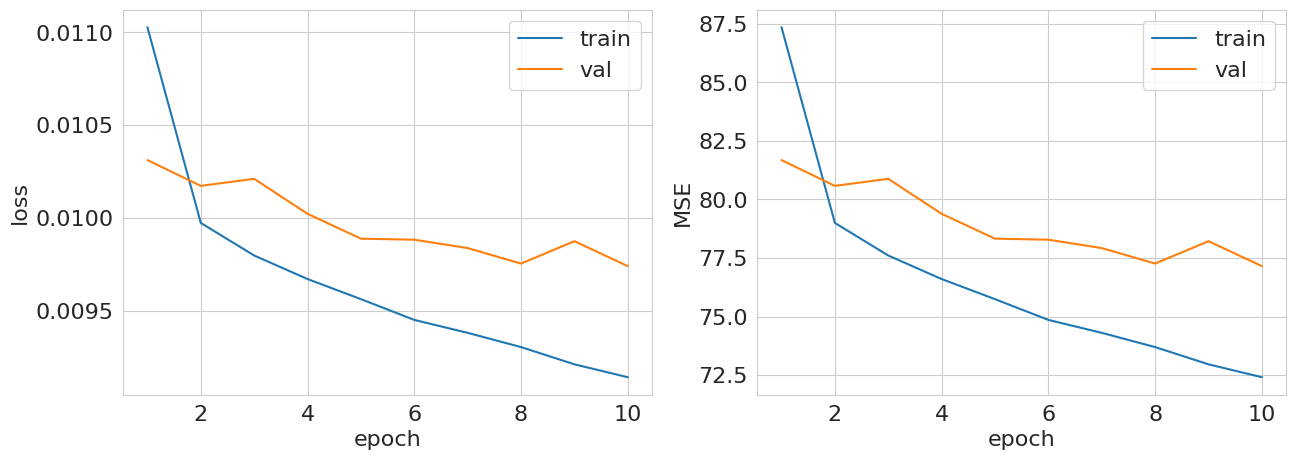

Validation MSE: 77.154


In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Увеличение размерности скрытого слоя вдвое:
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = Sigmoid()  # Сигмоидная активация

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)  # Гарантируем выход в [0, 1]
        return out

# Создаем архитектуру с количеством скрытых слоев большим вдвое
input_size = X_train.shape[1]
hidden_size = 128*2
modelRegNetTwoHidden = RegressionNet(input_size, hidden_size).to(device)

model_adam, train_mse_adam, val_mse_adam = train_regression_model(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm,model = modelRegNetTwoHidden, num_epochs = 10,optimizer_name='adam'
)

**Выводы**
* Добавление скрытых слоев, а также увеличение размерностей слоев не сильно лучше влияют на качество модели. Хотя эпох обучения всего 10, видно, что сеть начинает переобучаться (чересчур подстраиваться под train данные), и хуже глобально аппроксимировать test данные.

* После примерно 4-5 эпохи в обеих моделях (увеличенного количества скрытых слоев и увеличенного количества размерности слоев), модель начинает переобучаться - оранжевая кривая, соответствующая Loss функции на test данных стоит на месте, или даже растет

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты.

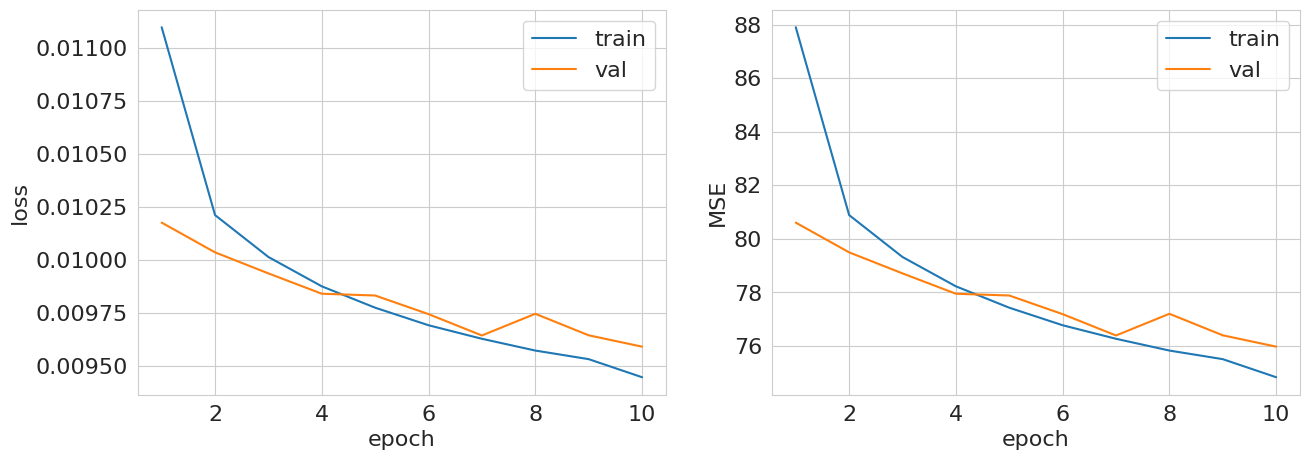

Validation MSE: 75.966


In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Используем
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(p=0.2)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(p=0.2)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.dropout1(out)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.dropout2(out)
        out = self.relu2(out)

        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

input_size = X_train.shape[1]
hidden_size = 128
modelRegNetTwoHidden = RegressionNet(input_size, hidden_size).to(device)

model_adam, train_mse_adam, val_mse_adam = train_regression_model(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, model=modelRegNetTwoHidden,num_epochs=10, optimizer_name='adam'
)


**Вывод**


*   Слой dropout'а заметно улучшил прогресс обучения нейросети. По оранжевой кривой видно, что loss на test начинает выходить на константу позже, на итерации 7.
* Также видно, что синяя кривая за 10 эпох упала меньше, чем на предыдущих архитектурах, это может говорить о том, что модель, хоть и не в точности приближается к интерполяции train данных, ведет себя лучше на тестовых, поскольку отражает не особенности именно выборки обучающих данных, а глобально аппроксимирует все данные ( в том числе и test )



**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

Learning rate: 0.01
Learning rate: 0.001
Learning rate: 0.0001


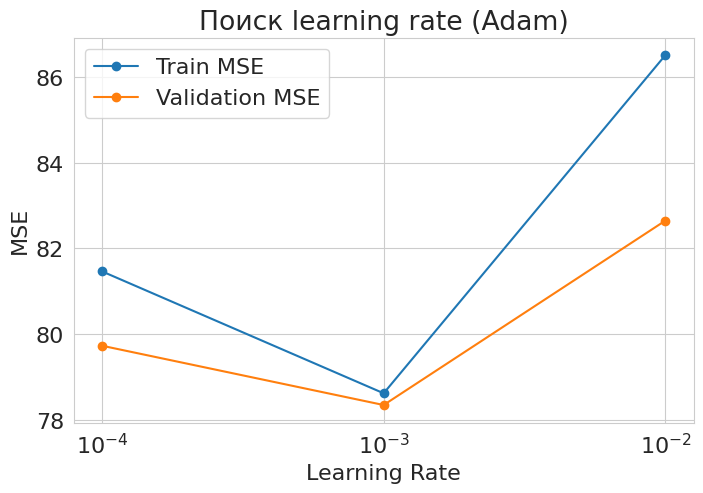

Weight decay: 1e-06
Weight decay: 1e-05
Weight decay: 0.0001


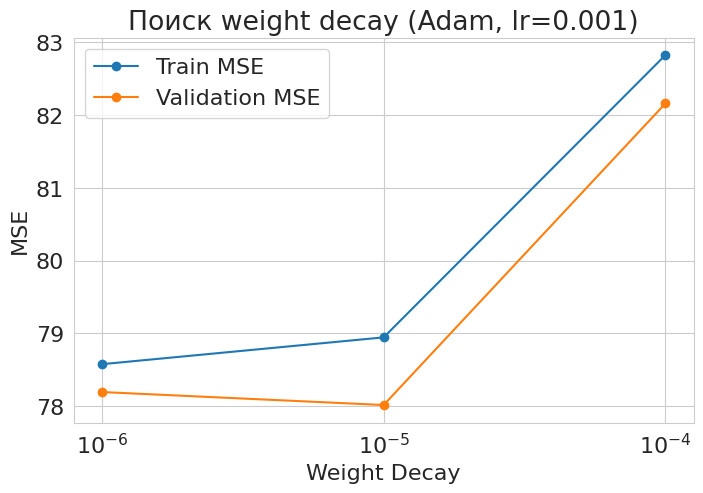

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

# Для хранения результатов
def search_learning_rates(lr_list, weight_decay=0.0):
    val_errors = []
    train_errors = []

    for lr in lr_list:
        print(f"Learning rate: {lr}")
        model = RegressionNet(X_train_norm.shape[1], 128).to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        def denormalized_mse(predictions, y_true_norm):
          predictions_denorm = denormalize(predictions)
          y_true_denorm = denormalize(y_true_norm)
          return torch.mean((predictions_denorm - y_true_denorm)**2)

        train_loader,val_loader=prepare_data_regression(X_train_norm, y_train_norm, X_val_norm, y_val_norm)

        train_mse, val_mse = train_and_validate(
            model=model,
            optimizer=optimizer,
            criterion=nn.MSELoss(),
            metric=denormalized_mse,
            train_loader=train_loader,
            val_loader=val_loader,
            num_epochs=4,
            verbose=False
        )

        train_errors.append(train_mse)
        val_errors.append(val_mse)

    return train_errors, val_errors

def search_weight_decay(wd_list, best_lr):
    val_errors = []
    train_errors = []

    for wd in wd_list:
        print(f"Weight decay: {wd}")
        model = RegressionNet(X_train_norm.shape[1], 128).to(device)
        optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=wd)


        def denormalized_mse(predictions, y_true_norm):
          predictions_denorm = denormalize(predictions)
          y_true_denorm = denormalize(y_true_norm)
          return torch.mean((predictions_denorm - y_true_denorm)**2)

        train_loader,val_loader=prepare_data_regression(X_train_norm, y_train_norm, X_val_norm, y_val_norm)

        train_mse, val_mse = train_and_validate(
            model=model,
            optimizer=optimizer,
            criterion=nn.MSELoss(),
            metric=denormalized_mse,
            train_loader=train_loader,
            val_loader=val_loader,
            num_epochs=4,
            verbose=False
        )

        train_errors.append(train_mse)
        val_errors.append(val_mse)

    return train_errors, val_errors

# Поиск по learning rate
lr_list = [1e-2, 1e-3, 1e-4]
train_lr, val_lr = search_learning_rates(lr_list)

plt.figure(figsize=(8, 5))
plt.plot(lr_list, train_lr, label="Train MSE", marker='o')
plt.plot(lr_list, val_lr, label="Validation MSE", marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.title("Поиск learning rate (Adam)")
plt.legend()
plt.grid(True)
plt.show()

# Найдем лучший lr
best_lr = lr_list[np.argmin(val_lr)]

# Поиск по weight_decay при лучшем lr
wd_list = [1e-6, 1e-5, 1e-4]
train_wd, val_wd = search_weight_decay(wd_list, best_lr)

plt.figure(figsize=(8, 5))
plt.plot(wd_list, train_wd, label="Train MSE", marker='o')
plt.plot(wd_list, val_wd, label="Validation MSE", marker='o')
plt.xscale('log')
plt.xlabel("Weight Decay")
plt.ylabel("MSE")
plt.title(f"Поиск weight decay (Adam, lr={best_lr})")
plt.legend()
plt.grid(True)
plt.show()


Лучшие настройки:

lr = 1e-3

Weight Decay = 10^-5

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Снова делим исходный dataset на обуч и тестовую выборки
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape




((386508, 90), (128837, 90))

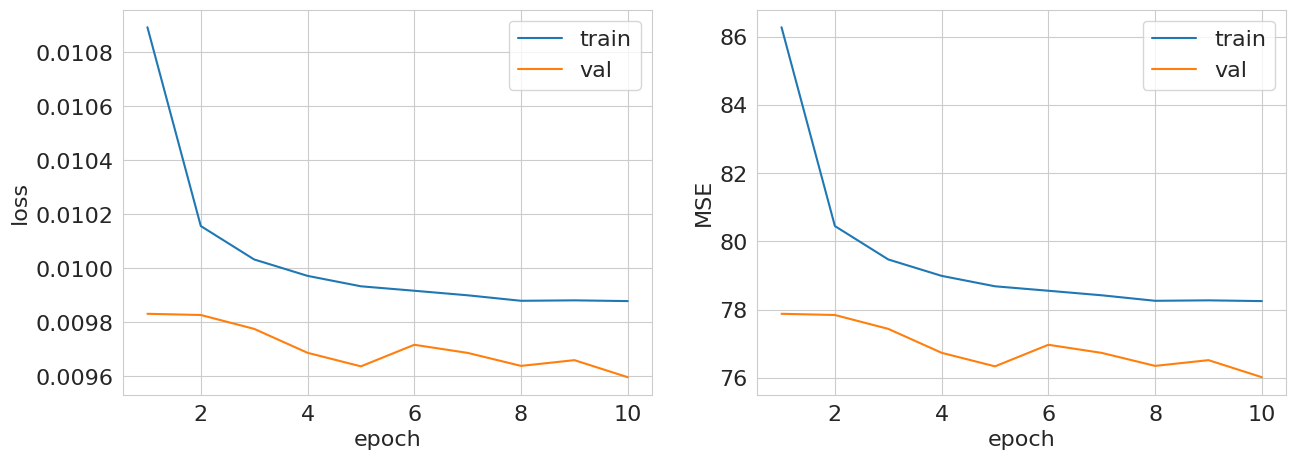

Validation MSE: 76.020

Final MSE on test set: 76.02


In [ ]:

import torch.optim as optim
from torch.nn import Sigmoid


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



def prepare_data_regression(X_train, y_train, X_val, y_val, batch_size=64):
    # Переносим данные на GPU, если доступно
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Создаем TensorDataset с reshape (-1, 1) для целевой переменной
    train_dataset = TensorDataset(
        torch.from_numpy(X_train).float().to(device),
        torch.from_numpy(y_train).float().to(device).reshape(-1, 1)
    )
    val_dataset = TensorDataset(
        torch.from_numpy(X_val).float().to(device),
        torch.from_numpy(y_val).float().to(device).reshape(-1, 1)
    )

    # Создаем DataLoader с перемешиванием для train
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader


x_scaler = StandardScaler() # Нормировка через средние и стандартные отклонения
 # (если распределение изначально было Гауссово, мы получим стандартное нормально N(0,1))
X_train_norm = x_scaler.fit_transform(X_train)
X_val_norm = x_scaler.transform(X_test)

y_min = y_train.min()
y_max = y_train.max()

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return (sample - y_min) / (y_max - y_min)


def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return sample * (y_max - y_min) + y_min

# Используем
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(p=0.2)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(p=0.2)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.dropout1(out)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.dropout2(out)
        out = self.relu2(out)

        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

y_train_norm = normalize(y_train)
y_test_norm = normalize(y_test)

input_size = X_train.shape[1]
hidden_size = 128
best_model = RegressionNet(input_size, hidden_size).to(device)

# Создание оптимизатора вручную с учетом лучшего weight decay
optimizer = optim.Adam(best_model.parameters(), lr=1e-3, weight_decay=1e-5)

train_loader, test_loader = prepare_data_regression(X_train_norm, y_train_norm, X_val_norm, y_test_norm)


def denormalized_mse(predictions, y_true_norm):
    predictions_denorm = denormalize(predictions)
    y_true_denorm = denormalize(y_true_norm)
    return torch.mean((predictions_denorm - y_true_denorm)**2)

train_mse, test_mse = train_and_validate(
    model=best_model,
    optimizer=optimizer,
    criterion=nn.MSELoss(),
    metric=denormalized_mse,
    train_loader=train_loader,
    val_loader=test_loader,
    num_epochs=10,
    verbose=True
)

print(f"\nFinal MSE on test set: {test_mse:.2f}")


**Итоговая метрика $MSE_{Best}$=76.02 - на лучшей архитектуре нейросети, с лучшими параметрами оптимизатора**

Параметры оптимизатора:
* 2 скрытых слоя по 128 внутренних нейрона, функция активации ReLu
* Adam оптимизатор
* ln=1e-3
* weight decay = 1e-5
* Dropout, p = 0.2

Это лучше чем Бэйзлайны, где метрика 89.6

## Кото-пост (0.1 балл)

Поделитесь эмоциями от практики и не забудьте прикрепить фотографию вашего помощника в этом домашнем задании!

...